In [2]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [32]:
# OLD LEDS

raw_red = [
    0.44, 1.62,
    0.95, 1.66,
    1.99, 1.71,
    4.15, 1.77,
    6.05, 1.81,
    8.09, 1.85,
    10.04, 1.88,
    12.02, 1.91    
]    


raw_yellow = [
    0.51, 1.74,
    1.16, 1.80,
    2.08, 1.86,
    3.96, 1.94,
    6.10, 2.02,
    8.10, 2.08,
    10.07, 2.13,
    12.11, 2.18
]    

raw_green = [
    0.50, 1.83,
    0.99, 1.86,
    2.03, 1.91,
    2.03, 1.91,
    4.13, 1.96,
    6.16, 1.99,
    8.09, 2.03,
    9.99, 2.05,
    12.07, 2.08,
]

# NEW LEDS w/ DMM

raw_red = [
    2.12, 1.63,
    4.32, 1.67,
    8.34, 1.70,
    16.93, 1.75,
]    


raw_yellow = [
    2.00, 1.79,
    4.40, 1.85,
    9.00, 1.93,
    16.8, 2.04,
]    

raw_green = [
4.10, 1.9,
6.43, 2.0,
8.98, 2.0,
14.0, 2.10,    
]


# NEW LEDS w/ Arduino and 200 Ohm resistor



raw_red = [
    1.099,1.593,
    2.003,1.622,
    3.763,1.652,
    8.602,1.695,
    12.512,1.725
]   

raw_yellow = [
    1.026,1.744,
    2.052,1.783,
    4.203,1.832,
    7.404,1.876,
    11.999,1.940,
    13.489,1.950
]    

raw_green = [
    1.099,1.842,
    2.101,1.886,
    3.958,1.940,
    8.748,2.033,
    12.805,2.101,
]



[1.61290323 1.70357751 1.7699115 ]
[1.63648395 1.7909507  1.88180075]


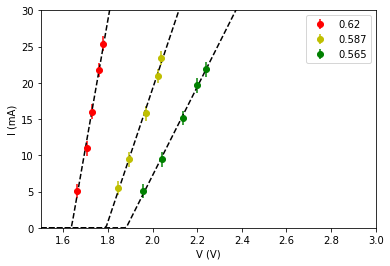

In [76]:
def diode_func(x, va, r):    
    y = (x - va) / r
    y[y<0] = 0
    return y

olmb_fit = np.array([])
va_fit = np.array([])
va_unc = np.array([])

def process_raw(raw, lmb, popt):
    global olmb_fit, va_fit, va_unc
    dat = np.array(raw)
    i = dat[::2]
    v = dat[1::2]
    
    v = v[i>3]
    i = i[i>3]
    plt.errorbar(v,i,yerr=1.0,fmt=popt, label=str(lmb))
    
    guess_va = 1.5   # 1.5 volts
    guess_r  = 0.010 # 10 Ohms
    
    par, cov = curve_fit(diode_func, v, i, p0=[guess_va, guess_r])
    va = par[0]
    r  = par[1]    
    err = np.diag(cov)[0]**0.5
    xv = np.linspace(1.5,3.0,200)
    yf = diode_func(xv, va, r)
    plt.plot(xv,yf,"k--")
    olmb_fit = np.append(olmb_fit, 1.0/lmb)
    va_fit = np.append(va_fit, va)
    va_unc = np.append(va_unc, err)


  
raw_red = [
    5.088,1.661,
    10.948,1.705,
    16.031,1.730,
    21.749,1.759,
    25.415,1.779
]   

raw_yellow = [
    5.522,1.847,
    9.433,1.896,
    15.786,1.969,
    20.918,2.023,
    23.411,2.038,
]    

raw_green = [
    5.083,1.959,
    9.433,2.043,
    15.151,2.135,
    19.648,2.199,
    21.847,2.238,
]


process_raw(raw_red, 0.620, "ro")
process_raw(raw_yellow, 0.587, "yo")
process_raw(raw_green, 0.565, "go")


plt.legend()             
plt.xlim(1.5,3.0)
#plt.xlim(1.5,2.0)
plt.ylim(0,30.0)
plt.xlabel("V (V)")
plt.ylabel("I (mA)")
#plt.savefig("instructor_red.pdf")

print(olmb_fit)
print(va_fit)

[1.61290323 1.70357751 1.7699115 ]
[1.63648395 1.7909507  1.88180075]
hc:   1.23984193
best fit slope [eV um]:   1.5707991742171008
measured / world:   1.2669350311592549


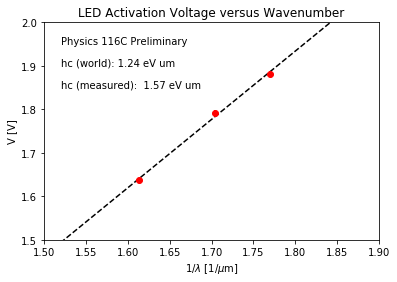

In [78]:
def line_func(x, m, b):    
    return m * x + b

print(olmb_fit)
print(va_fit)

# override with by-eye value
#va_fit[3] = 2.5

plt.errorbar(olmb_fit,va_fit,yerr=va_unc,fmt="ro")
guess_m = 1.0   # 1.5 volts
guess_b = 0.0 # 10 Ohms
par, cov = curve_fit(line_func, olmb_fit, va_fit, p0=[guess_m, guess_b])
mfit = par[0]
bfit = par[1]

xv = np.linspace(0,5.0,20)
yf = line_func(xv, mfit, bfit)
plt.plot(xv,yf,"k--")

plt.xlim(1.5,1.9)
plt.ylim(1.5,2.0)
plt.xlabel("1/$\lambda$ [1/$\mu$m]")
plt.ylabel("V [V]")
plt.title("LED Activation Voltage versus Wavenumber")
plt.text(1.52,1.95,"Physics 116C Preliminary")
plt.text(1.52,1.90,"hc (world): 1.24 eV um")
plt.text(1.52,1.85,"hc (measured):  " + str(np.round(mfit,2)) + " eV um")

         
hc = 1.23984193

print("hc:  ", hc)
print("best fit slope [eV um]:  ", mfit)
print("measured / world:  ", mfit/hc)

plt.savefig("instructor_planck.pdf")
